## Fitting an exponential distribution to car intervals

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.gifmania.co.uk%2FVehicles-Animated-Gifs%2FAnimated-Cars%2FSports-Cars%2FRed-Porsche-911-54536.gif&f=1&nofb=1" alt="car">



I have collected the interval in seconds between cars in my road at a particular time window in seconds:

In [16]:
car<-c(10,35,10,35,49,10,3,31,6,22,0.5,9,34,17,11,52,49,10,3,
       28,5,53,58,19,2,128,40,43,6,7,12,41,29,12,126,
       18,15,47,43,65,41,5,1,13,6,20.7,70,59,35,34,23,1,25,
       7,1,72,3,17,30,28,84,13,42,2,33,9,197,99,46,8,21,
       56)
summary(car)
str(car)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50    9.00   22.50   31.88   43.00  197.00 

 num [1:72] 10 35 10 35 49 10 3 31 6 22 ...


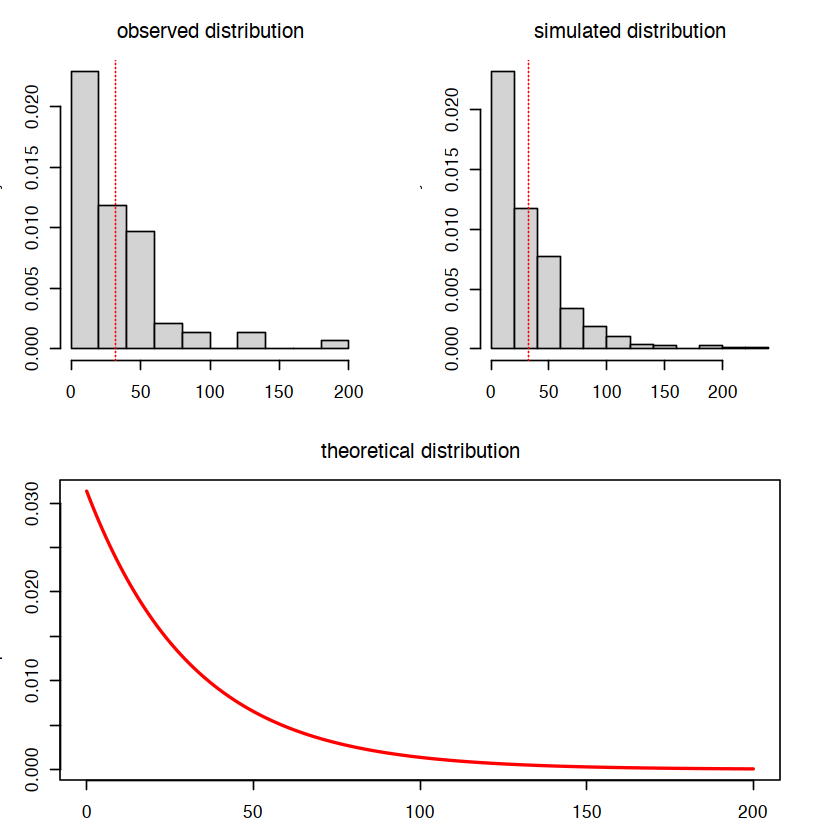

In [9]:
#prepare space for three figures:
#1 observed histogram distribution
#2 simulated histogram distribution based on observed mean (car rate)
#3 theoretical probability plot for a 200 seconds window based
#on observed main rate
par(mfrow=c(1,2))
par(mai=rep(0.5, 4))
layout(matrix(c(1,2,3,3), ncol = 2, byrow = TRUE))

hist(car,breaks = 10,prob=T,main = "observed distribution")
mean.int<-mean(car)
abline(v=mean.int,col="red",lty=3)#vertical line = mean interval

sim.int<-rexp(1000,1/mean.int)
hist(sim.int,breaks=10,prob=T,main="simulated distribution")
abline(v=mean.int,col="red",lty=3)


car.int <- seq(0, 200, by = 1)
prob.int <- dexp(car.int, rate = 1/1/mean.int)  
plot(car.int,prob.int,main="theoretical distribution",
     type="l",lwd=2,col="red",xlab="interval between cars")

In [10]:
pexp(10, rate=1/mean.int)#prob of one car showing up in a minute or less

[1] 0.2692604

In [14]:
dexp(120, rate=1/mean.int)#prob of next car passing later than in 2 minutes

[1] 0.000727216

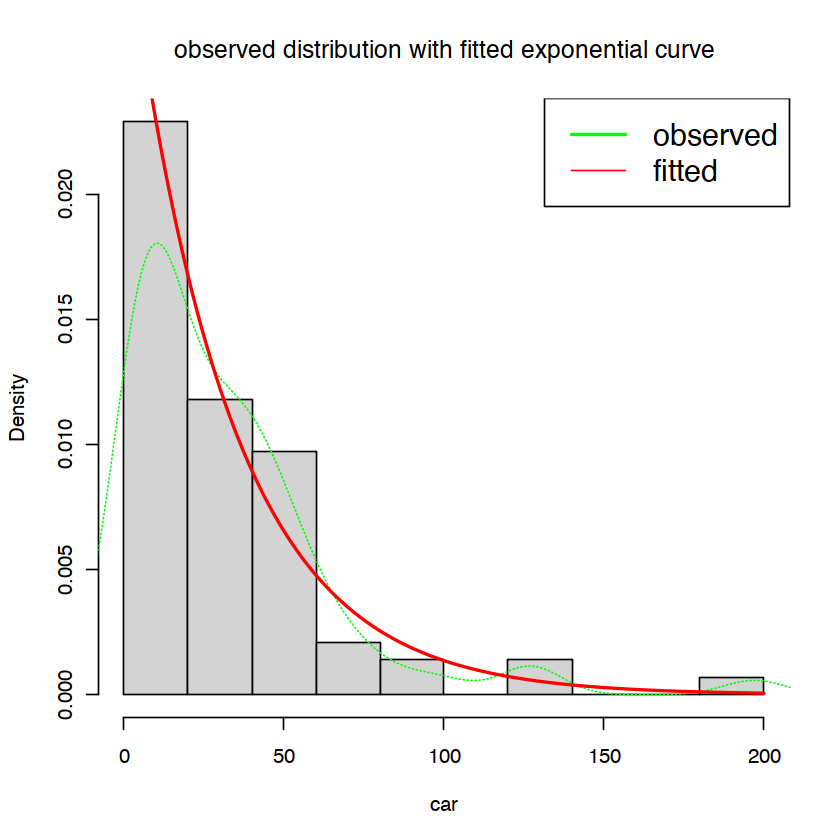

In [24]:
hist(car,breaks = 10,prob=T,main = "observed distribution with fitted exponential curve")
lines(density(car),lty=3,col="green")
lines(car.int,prob.int,lwd=2,col="red")
legend("topright", legend=c("observed", "fitted"),
       col=c("green", "red"), lwd=c(2,1), cex=1.5)